<a href="https://colab.research.google.com/github/madanjha/PythonDS/blob/main/LinearRegressionHandon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv("/content/new_insurance_data.csv")
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [16]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [17]:
sex_mode=df['sex'].mode()
sex_mode

,sex
0,male


In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [20]:
df.duplicated().sum()

0

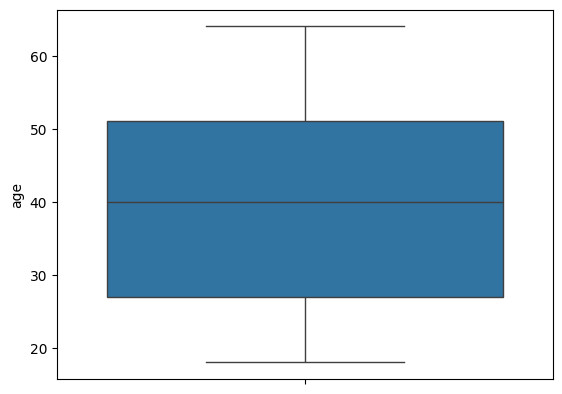

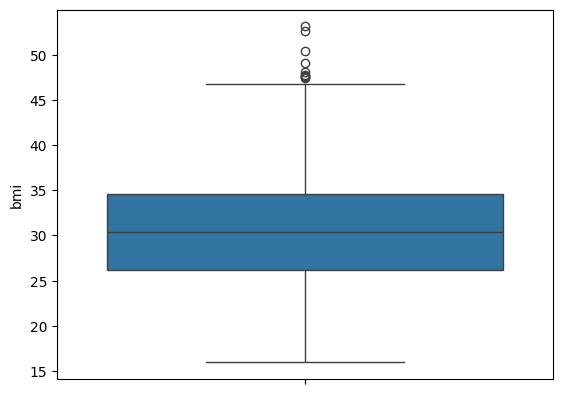

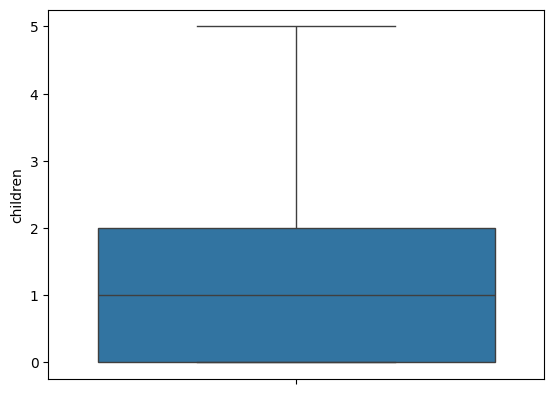

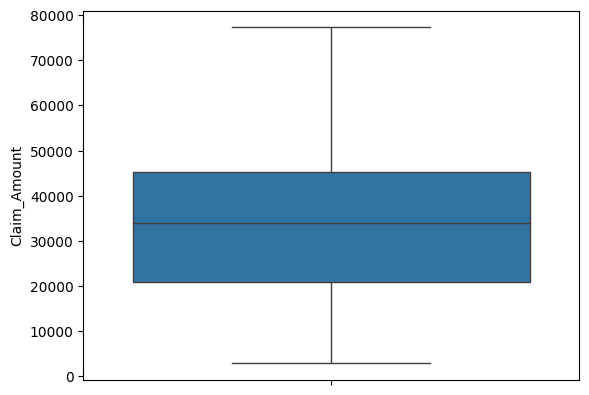

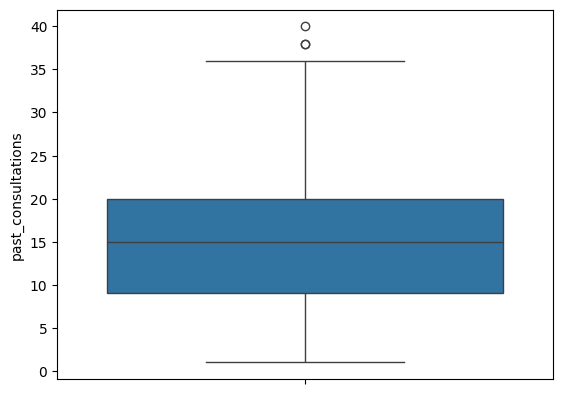

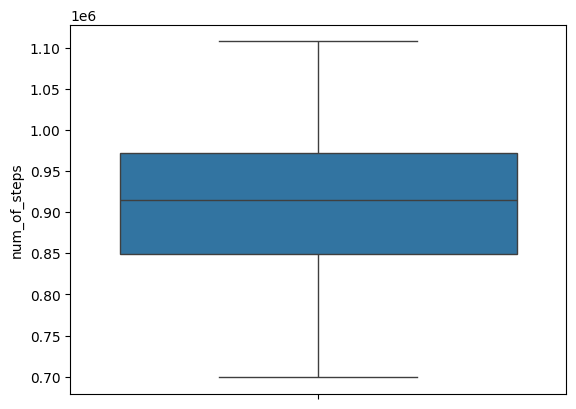

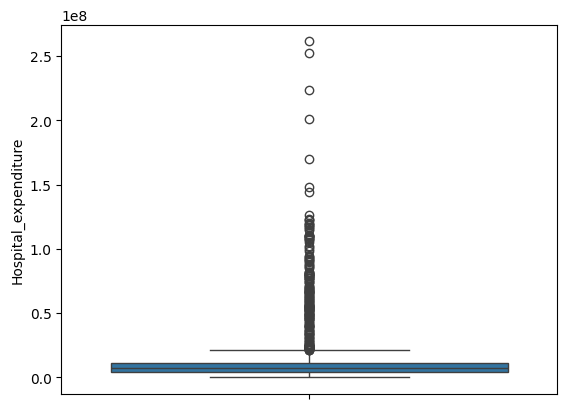

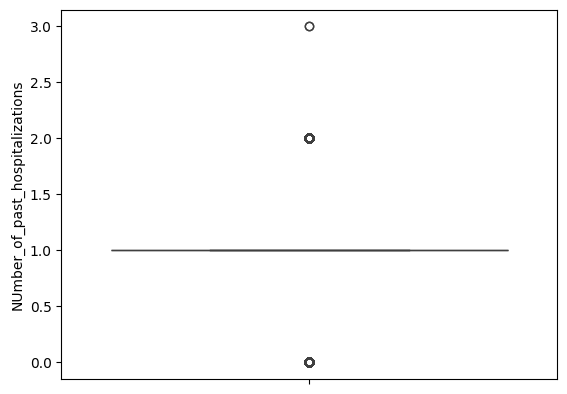

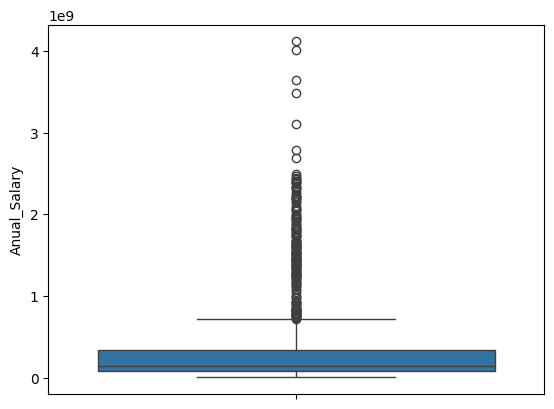

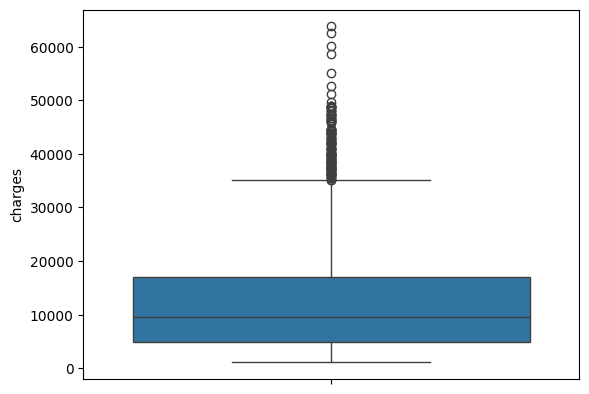

In [22]:
#outlier
for col in df.columns:
  if df[col].dtype!='object':
    sns.boxplot(df[col])
    plt.show()

In [27]:
q1=df[col].quantile(0.25)
q3=df[col].quantile(0.75)
iqr=q3-q1
uL=q3+1.5*iqr
lL=q1-1.5*iqr
print(iqr)
print(uL)
print(lL)

12121.881475000002
35146.954912500005
-13340.570987500003


In [29]:
q1=df['Anual_Salary'].quantile(0.25)
q3=df['Anual_Salary'].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
uL=q3+1.5*iqr
lL=q1-1.5*iqr
print(iqr)
print(uL)
print(lL)

79645233.34
333766040.1
254120806.76000002
714947250.24
-301535976.8000001


In [30]:
for col in ['charges','Anual_Salary','Hospital_expenditure','past_consultations','bmi']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    UL=q3+1.5*iqr
    LL=q1-1.5*iqr
#detection
    outlier_len=len(df[(df[col]>UL) | (df[col]<LL)])
    total_len=len(df)
    print(f'percentage of outliers  for {col} : {(outlier_len/total_len)*100}%')
#(35/1325)*100

percentage of outliers  for charges : 9.712509712509712%
percentage of outliers  for Anual_Salary : 14.452214452214452%
percentage of outliers  for Hospital_expenditure : 15.151515151515152%
percentage of outliers  for past_consultations : 0.2331002331002331%
percentage of outliers  for bmi : 0.6993006993006993%


In [34]:
cols=['charges','Anual_Salary','bmi']
for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    UL=q3+1.5*iqr
    LL=q1-1.5*iqr
    df=df[(df[col]>=LL)&(df[col]<=UL)]
    df

In [35]:
df['bmi']>27

,bmi
0,False
1,True
2,True
3,True
4,True
...,...
1017,True
1018,False
1019,False
1021,True


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

In [41]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,20.0,1,28.025,1.0,1,33996.01743,16.0,972338.0,1.064227e+07,1.0,3.374124e+08,1,17560.37975
1018,32.0,0,23.650,1.0,0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,2,17626.23951
1019,28.0,1,23.980,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2,17663.14420
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,0,17878.90068


In [ ]:
#multicollinerarity
#VIF(Feature Selection)

In [48]:
x=df.drop('charges',axis=1)
y=df['charges']

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['col']=x.columns
vif

,vif,col
0,32.228045,age
1,1.935128,sex
2,28.831478,bmi
3,2.120868,children
4,2.331187,smoker
5,5.624183,Claim_Amount
6,6.139849,past_consultations
7,68.289648,num_of_steps
8,5.197649,Hospital_expenditure
9,13.259023,NUmber_of_past_hospitalizations


In [56]:
x=x.drop('num_of_steps',axis=1)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['col']=x.columns
vif

,vif,col
0,28.516784,age
1,1.907690,sex
2,14.243967,bmi
3,2.093899,children
4,2.169039,smoker
5,5.294672,Claim_Amount
6,5.771979,past_consultations
7,4.975072,Hospital_expenditure
8,12.238962,NUmber_of_past_hospitalizations
9,11.597698,Anual_Salary


In [58]:
x=x.drop('age',axis=1)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['col']=x.columns
vif

,vif,col
0,1.871707,sex
1,13.641740,bmi
2,1.995665,children
3,1.337466,smoker
4,5.219571,Claim_Amount
5,5.733663,past_consultations
6,4.946042,Hospital_expenditure
7,8.808017,NUmber_of_past_hospitalizations
8,6.064407,Anual_Salary
9,2.914761,region


In [60]:
x=x.drop('bmi',axis=1)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['col']=x.columns
vif

,vif,col
0,1.779835,sex
1,1.995161,children
2,1.261415,smoker
3,4.670951,Claim_Amount
4,5.260204,past_consultations
5,4.571200,Hospital_expenditure
6,7.971165,NUmber_of_past_hospitalizations
7,6.029261,Anual_Salary
8,2.575454,region


In [62]:
x.corr()

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
sex,1.000000,0.024106,-0.003388,-0.029353,-0.002942,-0.007277,-0.083817,-0.036700,-0.016317
children,0.024106,1.000000,-0.044515,0.030156,0.045325,-0.018525,0.312143,0.054177,0.052229
smoker,-0.003388,-0.044515,1.000000,0.118694,0.077482,0.193922,0.069796,0.416549,-0.045721
Claim_Amount,-0.029353,0.030156,0.118694,1.000000,0.062449,0.034192,0.104884,0.150028,0.003652
past_consultations,-0.002942,0.045325,0.077482,0.062449,1.000000,0.059684,0.130871,0.250756,0.018545
Hospital_expenditure,-0.007277,-0.018525,0.193922,0.034192,0.059684,1.000000,0.122261,0.315941,0.001855
NUmber_of_past_hospitalizations,-0.083817,0.312143,0.069796,0.104884,0.130871,0.122261,1.000000,0.386329,-0.051527
Anual_Salary,-0.036700,0.054177,0.416549,0.150028,0.250756,0.315941,0.386329,1.000000,-0.051457
region,-0.016317,0.052229,-0.045721,0.003652,0.018545,0.001855,-0.051527,-0.051457,1.000000


In [63]:
#model bulding
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [71]:
#tain_test
from sklearn.model_selection import train_test_split

In [76]:
x,y

(      sex  children  smoker  Claim_Amount  past_consultations  \
 0       1       0.0       0   29087.54313                17.0   
 1       1       0.0       0   39053.67437                 7.0   
 2       1       0.0       0   39023.62759                19.0   
 3       1       0.0       0   28185.39332                11.0   
 4       1       0.0       0   14697.85941                16.0   
 ...   ...       ...     ...           ...                 ...   
 1017    1       1.0       1   33996.01743                16.0   
 1018    0       1.0       0   53840.22825                18.0   
 1019    1       3.0       1   41686.19886                12.0   
 1021    0       0.0       0   17100.29000                26.0   
 1024    1       4.0       1   23327.30277                14.0   
 
       Hospital_expenditure  NUmber_of_past_hospitalizations  Anual_Salary  \
 0             4.720921e+06                              0.0  5.578497e+07   
 1             4.329832e+06                       

In [78]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(771, 9)
(193, 9)
(771,)
(193,)


In [79]:
#initilizing the model
model=LinearRegression()
#traning the model,fit()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
#testing mode
print(y_test)
print(X_test)


258     3906.12700
905    13041.92100
563     7749.15640
991    15828.82173
374     5245.22690
          ...     
834    11848.14100
72      1832.09400
288     4266.16580
837    11881.35800
926    13457.96080
Name: charges, Length: 193, dtype: float64
     sex  children  smoker  Claim_Amount  past_consultations  \
258    1       3.0       0  17845.503380                 7.0   
905    0       0.0       0  33885.797680                21.0   
563    0       2.0       0  44495.915250                14.0   
991    0       4.0       0  37530.477460                21.0   
374    0       1.0       0  21763.625070                 4.0   
..   ...       ...     ...           ...                 ...   
834    0       0.0       0  22778.601030                24.0   
72     1       1.0       0   5987.151966                16.0   
288    1       2.0       0  30237.338710                15.0   
837    0       2.0       0  45697.302120                10.0   
926    0       0.0       0  24319.503240    

In [84]:
y_pred=model.predict(X_test)
print(y_pred)

[ 6231.62791339 13908.01749675  9792.95079191 15579.08609515
  5275.79224492  6270.59317318 11290.02767898  6910.94894864
  3699.96803951  3915.4630054   7010.21446016  6919.24435191
  4895.70700181   566.51312806 10858.21235248 10923.75233811
   140.67368127 11411.12045356  8972.94160284  1925.64457519
  5847.44782338  6470.45884714  6454.07731172  1436.9960307
 10596.13717957 10962.42057544  4895.7518913   6479.89274917
  1525.16519352  7500.91606856 12815.68263621  5467.06659402
  1596.7072838   7535.36493049  1030.05043113  4535.93512663
  5456.4697885   8855.47412704  4193.81939799  5776.33676477
 16497.76317118  8220.69609571  5957.28630114  7066.46689856
  5101.8665655   9841.26433904  7855.9932804   8657.36994249
  6327.92009141 12522.63559239  3151.2076006   3369.52834799
 15753.80760513  6951.17709903  4357.91799908  6314.96315649
 13083.75926679 12408.83280293  9629.73889472  5574.56925254
  7679.89264412  6650.89408395  4055.94212049  6347.81717964
  5921.04092163  6981.776

In [85]:
model.intercept_

-1351.9726337279308

In [86]:
model.coef_

array([1.45458678e+01, 3.91750232e+01, 3.46596705e+01, 1.06650413e-02,
       2.87820565e+01, 5.45385982e-05, 2.77036662e+03, 4.37436015e-05,
       2.64336172e+01])